<a href="https://colab.research.google.com/github/nadicika/PCVK/blob/main/Pertemuan11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Inthania Nadicika Kurniawan**

**Absen: 12**

**Kelas: TI-3C**

**MODUL11 – Metode Deteksi Objek: Template Matching, Edge Detection, CornerDetection, Grid Detection, Contour Detection**

###**D. Latihan Praktikum**

**1. Melakukan sinkronisasi dengan akun drive dan melakukan import library yang dibutuhkan**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

**2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya**

In [3]:
!pip install opencv-python

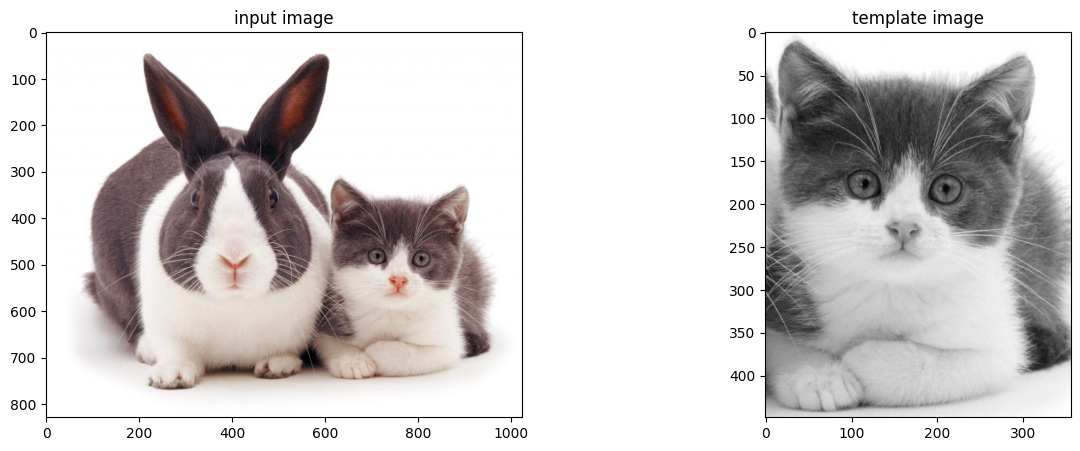

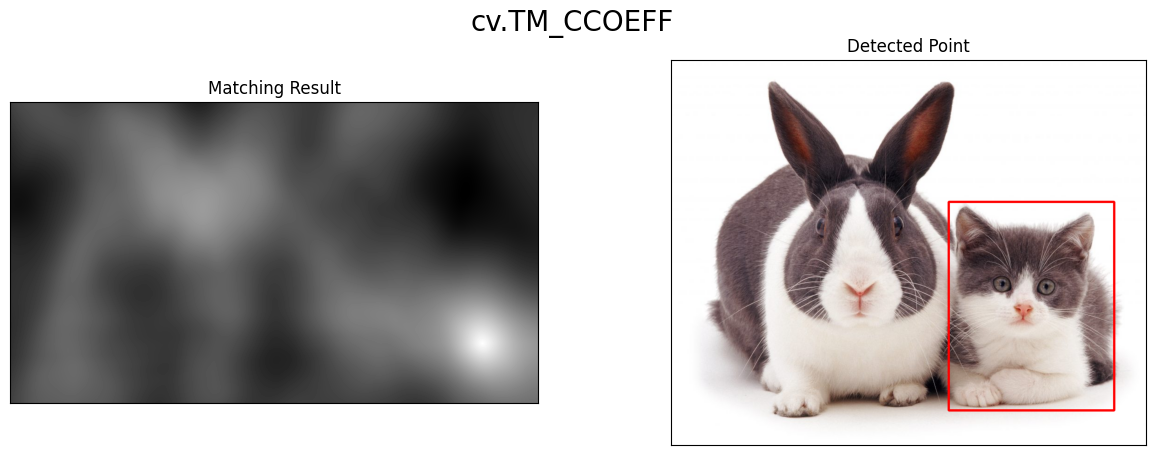

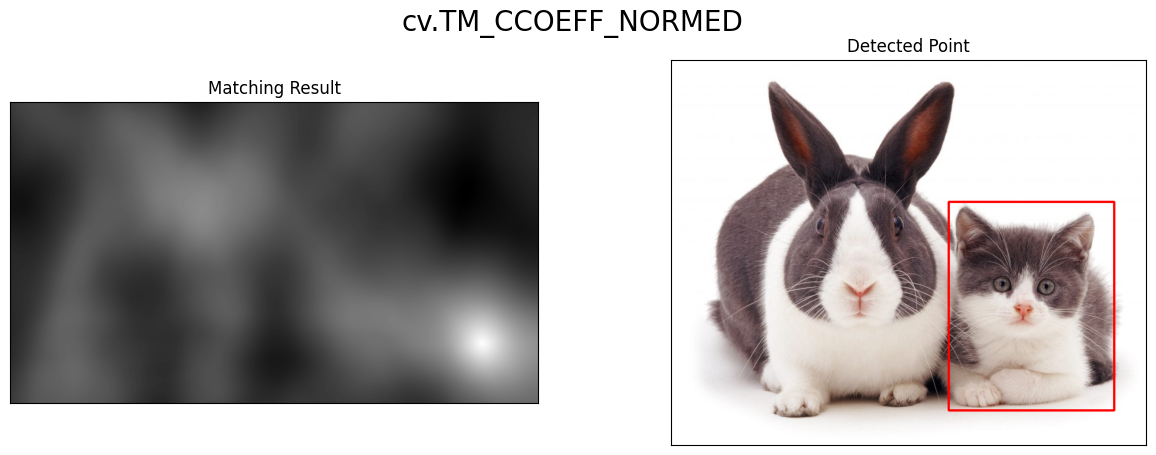

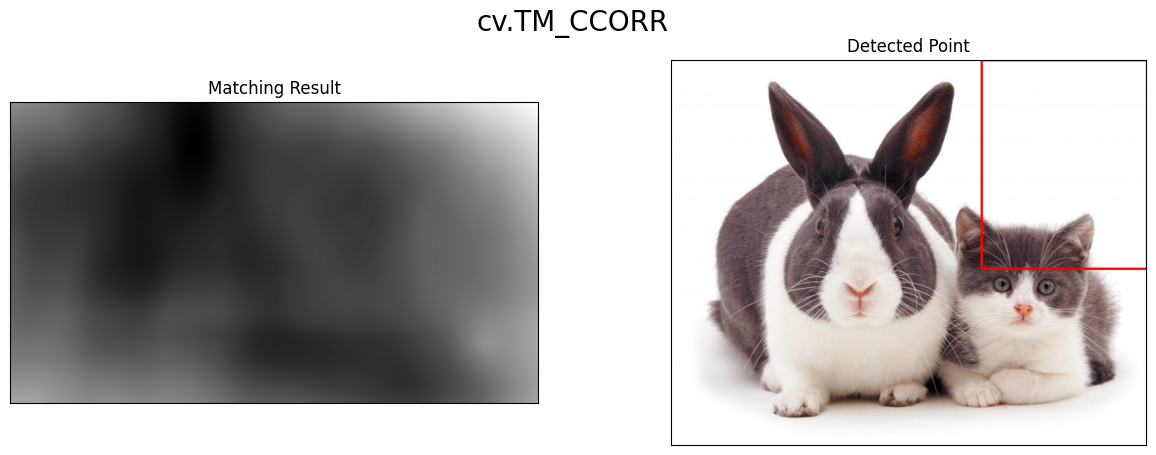

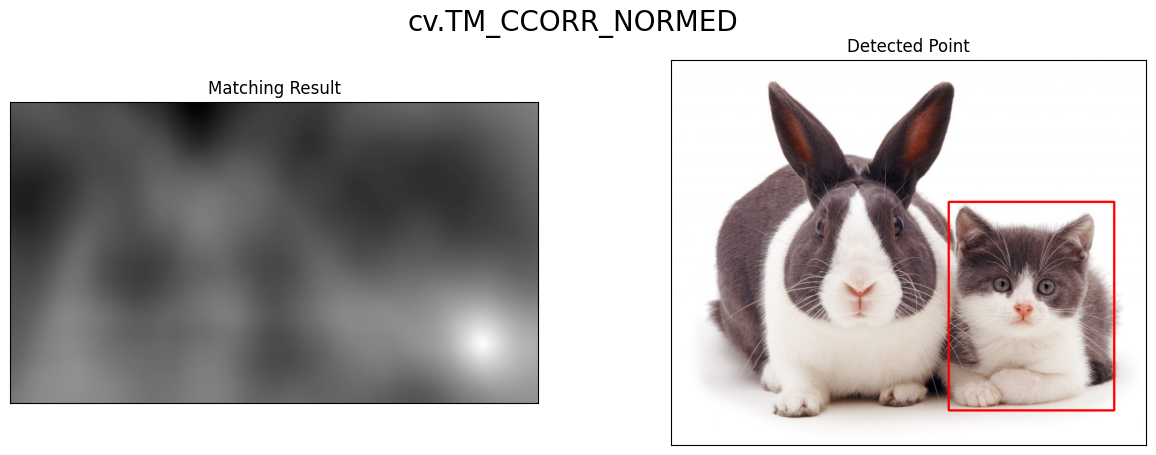

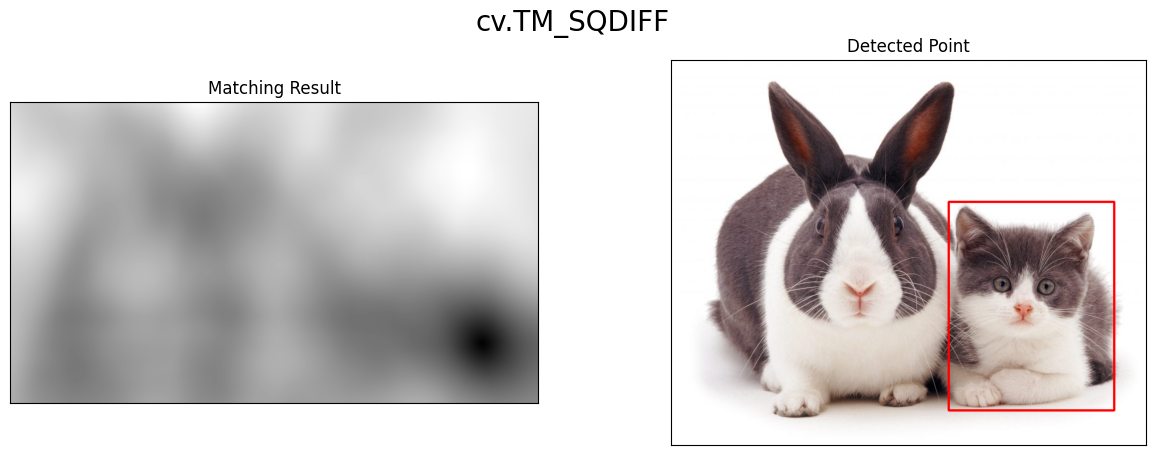

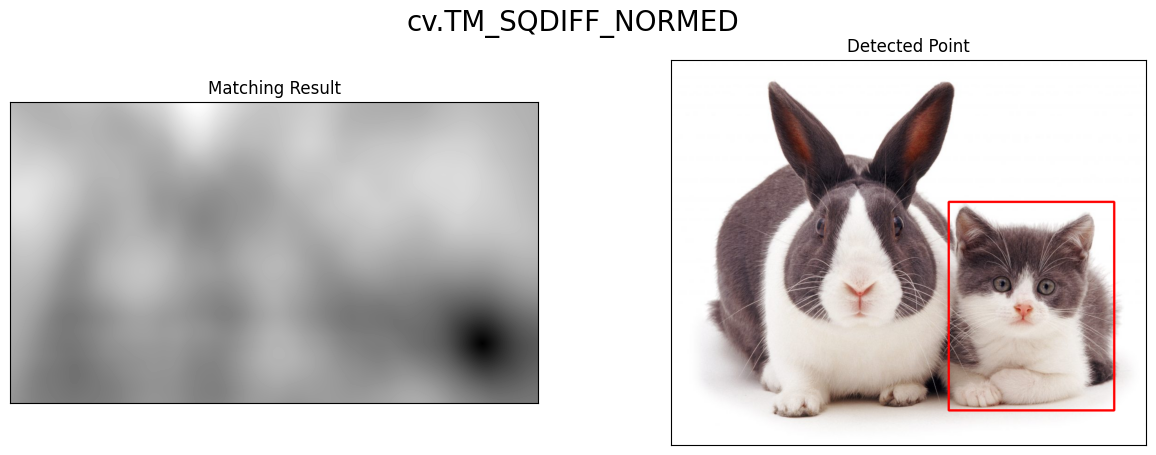

In [ ]:
# load citra input
img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/cat2_templatejpg.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255), thickness = 4)
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

**3. Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai
berikut.**

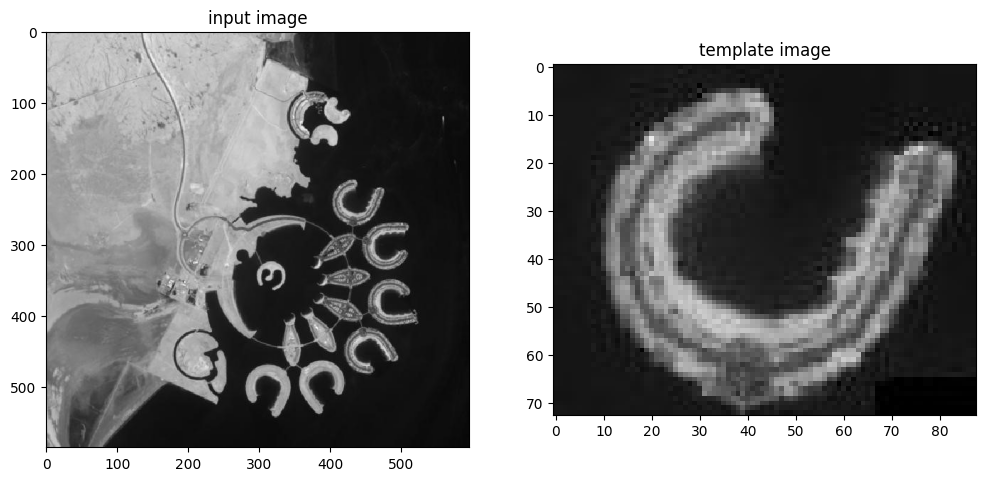

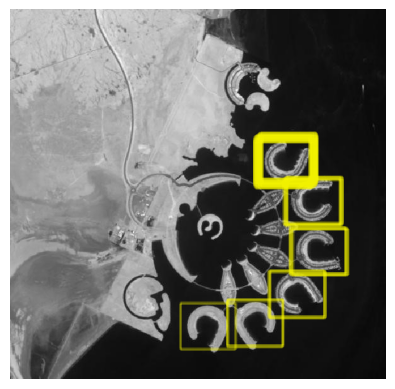

In [ ]:
from skimage.feature import match_template

img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/bahrain.jpg', 0)
template = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/bahrain-template.jpg', 0)

f, axarr = plt. subplots(1,2,figsize=(12,8))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# Hitung kemiripan citra dengan citra template
result = match_template(img, template)

# Tentukan threshold untuk menentukan hasil match
threshold = 0.45
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(img, cmap=plt.cm.gray)
ax.set_axis_off()
height, width = template.shape
for loc in zip(*locations[::-1]):
    rect = plt.Rectangle(loc, width, height, edgecolor='yellow', facecolor='none', linewidth=0.1)
    ax.add_patch(rect)

plt.show()

**4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg**

**a. Sobel Edge Detection**

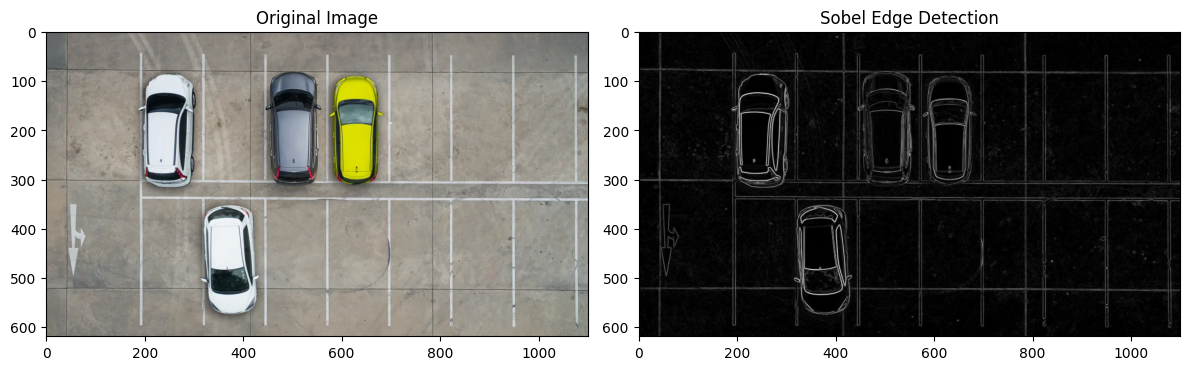

In [ ]:
img= cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/car-park.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_car = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Sobel Edge Detection
sobel_x = cv.Sobel(img_gray, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(img_gray, cv.CV_64F, 0, 1, ksize=3)
sobel_combined = cv.magnitude(sobel_x, sobel_y)

# Tampilkan gambar asli dan hasil deteksi tepi
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_car, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')

plt.tight_layout()
plt.show()

**b. Canny Edge Detection**

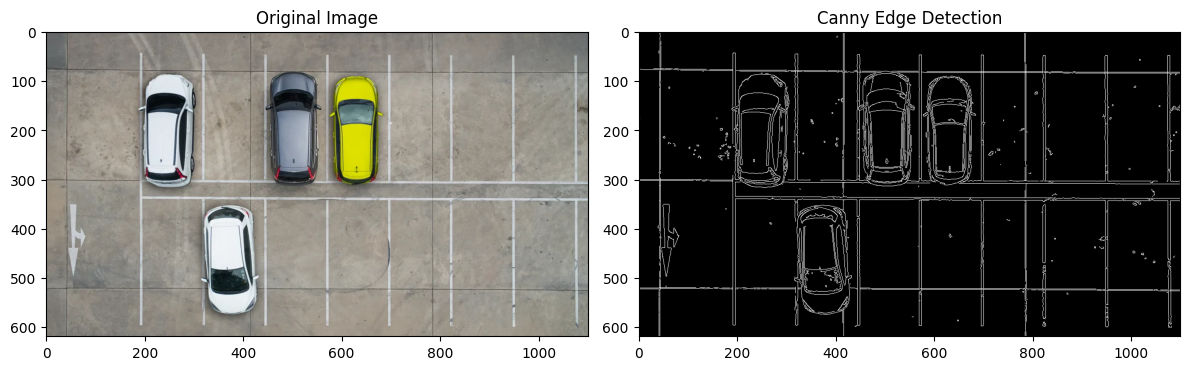

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/car-park.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Canny Edge Detection
edged = cv.Canny(img_gray, 100, 200)

# Tampilkan gambar asli dan hasil deteksi tepi
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(edged, cmap='gray')
plt.title('Canny Edge Detection')

plt.tight_layout()
plt.show()

**c. Laplacian Edge Detection**

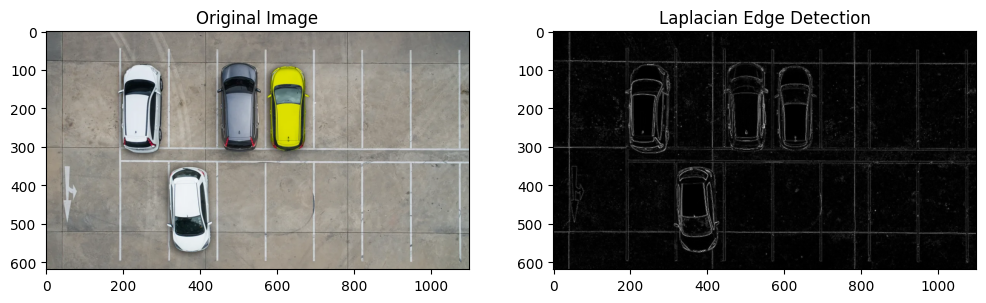

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/car-park.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Laplacian Edge Detection
laplacian = cv.Laplacian(img_gray, cv.CV_64F)
laplacian_abs = cv.convertScaleAbs(laplacian)

# Tampilkan gambar asli dan hasil deteksi tepi
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(laplacian_abs, cmap='gray')
plt.title('Laplacian Edge Detection')

plt.show()

**5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg**

**a. Harris Corner Detection**

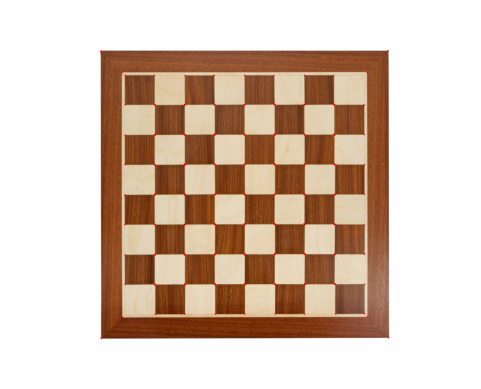

In [ ]:
input_img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img)
harris_output = cv.cornerHarris(gray_img,2,3, 3)

#hasil harris corner dilakukan dilasi untuk menandai sudut
harris_output = cv.dilate(harris_output, None)

#Threshold untuk mengoptimalkan nilai
input_img[dst>0.01*dst.max()]=[0,0,255]

plt.axis('off')
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

**b. Shi-Tomasi Detection**

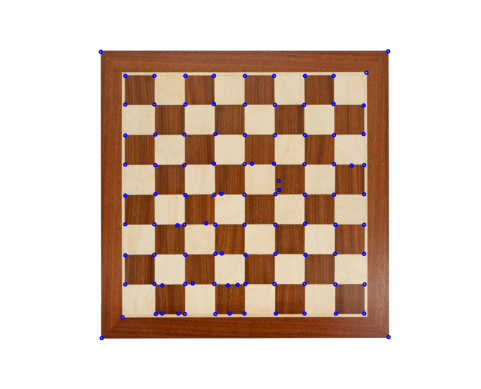

In [ ]:
input_img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray_img, 100,0.01,10)
corners = np. int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(input_img, (x,y),3,255,2)

plt.axis('off')
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

**6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan
teori**

Number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


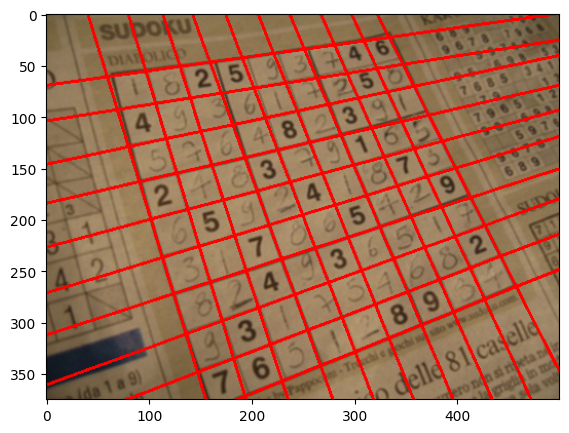

In [ ]:
input_img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/sudoku.jpg')
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines were found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('Number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(10,5))
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

**7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg,**

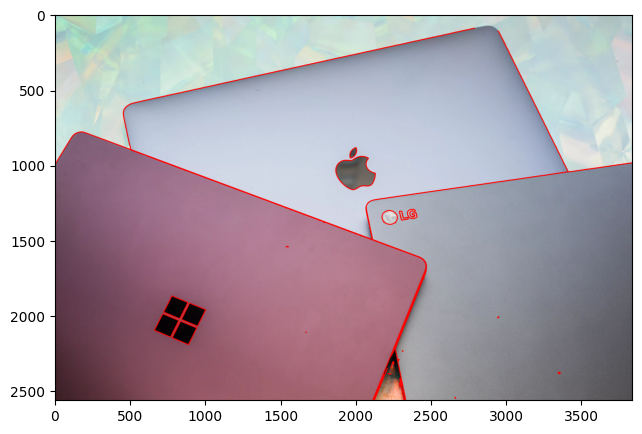

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/laptop.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 5)

plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

###**E. Pengayaan Materi KTP**

1. Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban

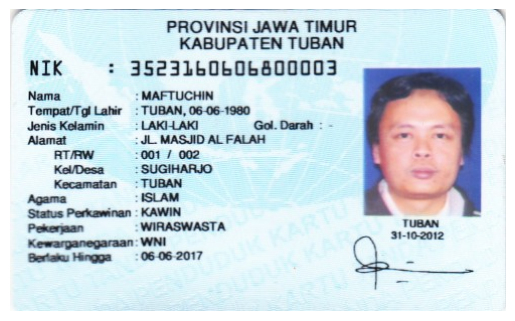

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/my images/KTP_More/ktp3.png')

plt.axis('off')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

2. Muat 2 library berikut sebagai tahapan persiapan


In [ ]:
import cv2
import os

3. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle
dapat direduksi

In [ ]:
# Filtering
for i in range(10):
    blurred = cv2.GaussianBlur(img, (5, 5), 0.5)

4. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan
binerisasi citra (thresholding)

168.0 (300, 493)


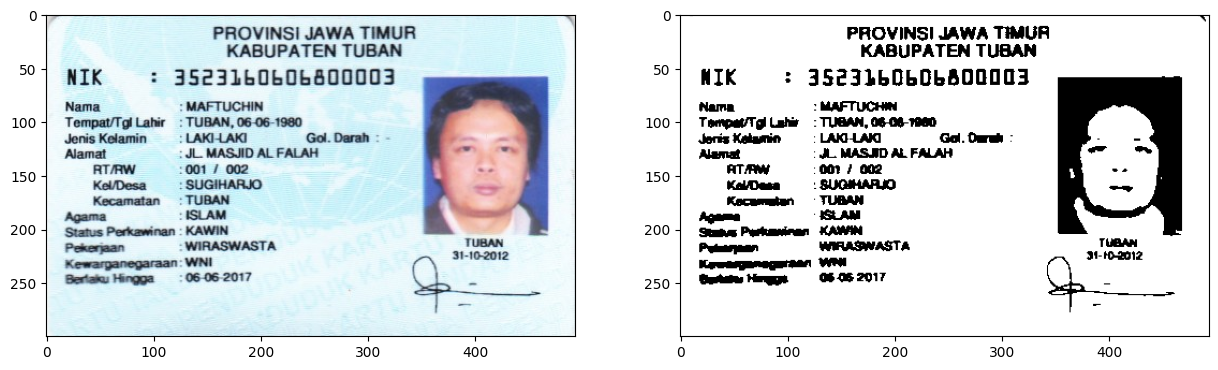

In [ ]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY
+ cv2.THRESH_OTSU)
print(ret, bw.shape)

# Tampilkan gambar asli dan hasil deteksi tepi
f, axarr = plt.subplots(1,2,figsize=(15,5))
axarr[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axarr[1].imshow(bw, cmap='gray')
plt.show()

5. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter
atau obyek tidak berhimpitan

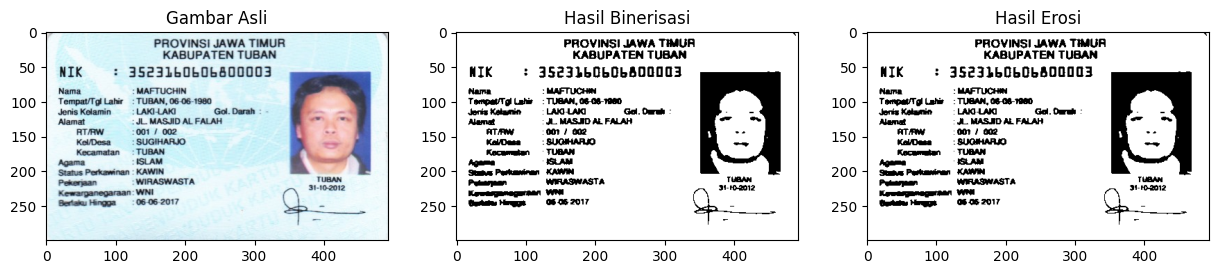

In [ ]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Terapkan operasi morfologi erosi
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Tampilkan gambar asli, hasil deteksi tepi, dan hasil erosi
f, axarr = plt.subplots(1, 3, figsize=(15, 5))
axarr[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axarr[0].set_title("Gambar Asli")
axarr[1].imshow(bw, cmap='gray')
axarr[1].set_title("Hasil Binerisasi")
axarr[2].imshow(erode, cmap='gray')
axarr[2].set_title("Hasil Erosi")
plt.show()

6. Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek.
Kontur harus diseleksi berdasarkan ukuran dan rasio sebuah karakter. Karakter/obyek di
dalam KTP ini bervariasi ukuran dan rasionya, sehingga setiap karakter/obyek perlu
penanganan yang berbeda. Contoh pada praktik ini berfokus pada karakter yang seukuran
dengan NIK. Jika hasil ekstraksi kontur memperlihatkan hasil lain yaitu karakter lain
terdeteksi, hal tersebut wajar karena perlu optimize code dan preprocessing yang lebih baik
(karena hasil akuisisi setiap citra dapat berbeda)

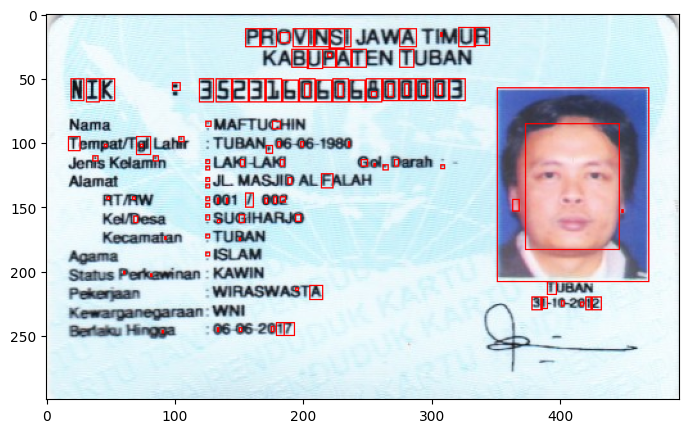

In [ ]:
blurred = cv.GaussianBlur(img, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

###**F. Tugas Praktikum**



Setiap citra memiliki karakteristik yang berbeda. Terapkan praktik pada materi pengayaan KTP
untuk setiap dataset KTP yang tersedia. Perhatikan kondisi awal dataset, terapkan preprocessing
yang sesuai jika kualitas visual citra kurang memadai untuk segera diolah. Pengerjaan dilakukan
secara berkelompok dengan aturan sebagai berikut:

* Kelompok 1 – KTP Riyanto Sleman
* Kelompok 2 – KTP Galang Raka Bengkulu
* Kelompok 3 – KTP Arief Wijaya Cimahi
* Kelompok 4 – KTP Edo Nias
* Kelompok 5 – KTP Widiarso Bekasi
* Kelompok 6 – KTP Abdurrauf Soppeng

**Kelompok 3**

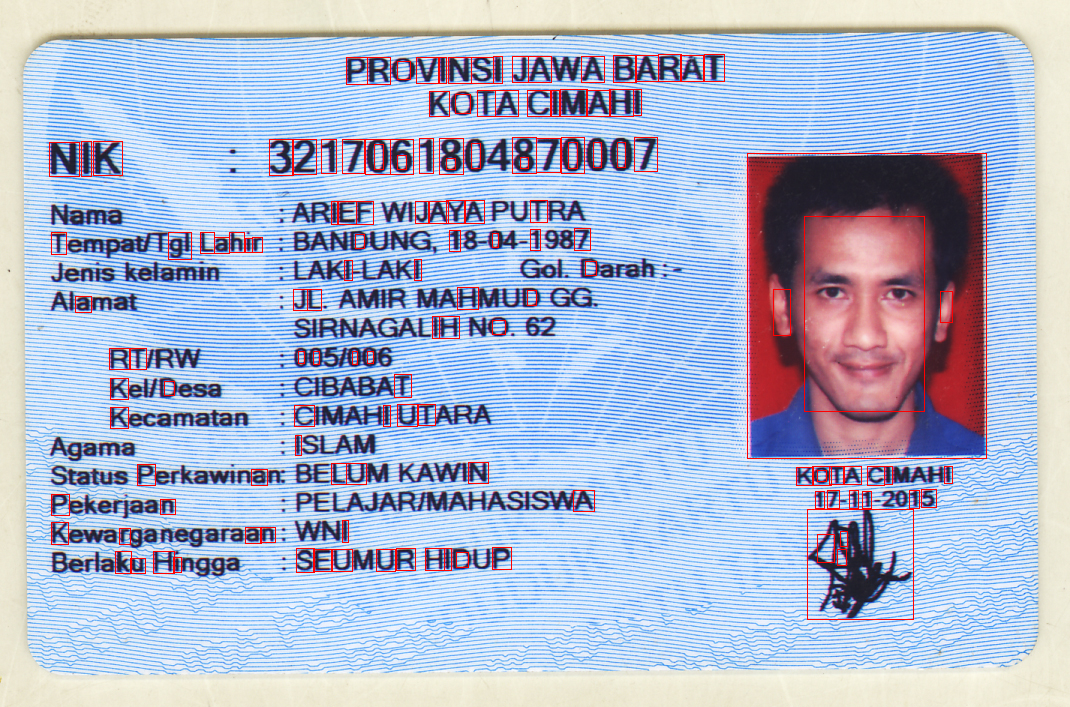

In [ ]:
# Baca gambar KTP
ktpImage = cv2.imread('/content/drive/MyDrive/PCVK/my images/KTP_More/ktp2.png')

# Ubah gambar menjadi skala abu-abu untuk deteksi tepi
gray = cv2.cvtColor(ktpImage, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # (5, 5) adalah ukuran kernel Gaussian, dan 0 adalah deviation

# Thresholding untuk membuat gambar biner
ret, thresholded = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

# Temukan kontur pada gambar tepi
contours,  hierarchy= cv2.findContours(thresholded, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Gambar kontur pada gambar asli
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(ktpImage, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 5 and float(ras) <= 1:
      cv.rectangle(ktpImage, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Tampilkan gambar dengan kontur
cv2_imshow(ktpImage)